⚠️ NOTE:
This notebook is for research and validation only.
Production logic lives in the `src/` directory.

 Exploratory Data Analysis
 Purpose

Understand BTC data

Check missing values

Visual sanity checks

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

DATA_PATH = r"C:\Users\shubh\crypto-market-opportunity-engine\data\processed\BTCUSDT_5m_2025.parquet"

df = pd.read_parquet(DATA_PATH)
df.head()


,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
open_time,,,,,,,,,,
2025-01-01 00:00:00,93576.00,93702.15,93537.50,93661.20,45.94160,2025-01-01 00:04:59.999999,4.301907e+06,7448,16.87967,1.580504e+06
2025-01-01 00:05:00,93661.20,93678.02,93600.00,93607.10,71.94585,2025-01-01 00:09:59.999999,6.736121e+06,4165,16.66761,1.560680e+06
2025-01-01 00:10:00,93607.10,93656.19,93489.03,93656.18,57.96928,2025-01-01 00:14:59.999999,5.423766e+06,8175,29.65936,2.774717e+06
2025-01-01 00:15:00,93656.19,93840.05,93614.95,93796.35,39.74456,2025-01-01 00:19:59.999999,3.727084e+06,8031,18.83666,1.766278e+06
2025-01-01 00:20:00,93796.35,93898.05,93707.81,93740.00,38.38053,2025-01-01 00:24:59.999999,3.600685e+06,10064,23.35948,2.191367e+06


In [2]:
# basic info
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 105120 entries, 2025-01-01 00:00:00 to 2025-12-31 23:55:00
Data columns (total 10 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   open                          105120 non-null  float64       
 1   high                          105120 non-null  float64       
 2   low                           105120 non-null  float64       
 3   close                         105120 non-null  float64       
 4   volume                        105120 non-null  float64       
 5   close_time                    105120 non-null  datetime64[ns]
 6   quote_asset_volume            105120 non-null  float64       
 7   number_of_trades              105120 non-null  int64         
 8   taker_buy_base_asset_volume   105120 non-null  float64       
 9   taker_buy_quote_asset_volume  105120 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
mem

In [3]:
# summary stats
df.describe()


,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
count,105120.000000,105120.000000,105120.000000,105120.000000,105120.000000,105120,1.051200e+05,105120.000000,105120.000000,1.051200e+05
mean,101633.080130,101711.879210,101553.244688,101633.022649,73.349613,2025-07-02 12:02:29.999998976,7.299292e+06,12973.444397,35.466664,3.530979e+06
min,74610.000000,74987.410000,74508.000000,74610.000000,0.909580,2025-01-01 00:04:59.999999,9.678485e+04,408.000000,0.260050,2.790528e+04
25%,91360.160000,91444.800000,91270.000000,91360.075000,23.517158,2025-04-02 06:03:44.999998976,2.393521e+06,5049.000000,10.014318,1.019359e+06
50%,103549.045000,103620.620000,103477.010000,103549.045000,42.689630,2025-07-02 12:02:29.999998976,4.335126e+06,8837.000000,19.465995,1.974466e+06
75%,111100.100000,111172.160000,111029.430000,111100.107500,81.490440,2025-10-01 18:01:14.999998976,8.204862e+06,15918.000000,39.468553,3.967108e+06
max,126011.180000,126199.630000,125868.130000,126011.180000,5120.929630,2025-12-31 23:59:59.999999,5.588519e+08,711259.000000,2884.492520,2.663202e+08
std,11705.682378,11697.940554,11712.476662,11705.735458,111.174971,NaN,1.081223e+07,13505.951853,57.362240,5.616685e+06


In [4]:
# missing values
df.isna().sum()


open                            0
high                            0
low                             0
close                           0
volume                          0
close_time                      0
quote_asset_volume              0
number_of_trades                0
taker_buy_base_asset_volume     0
taker_buy_quote_asset_volume    0
dtype: int64

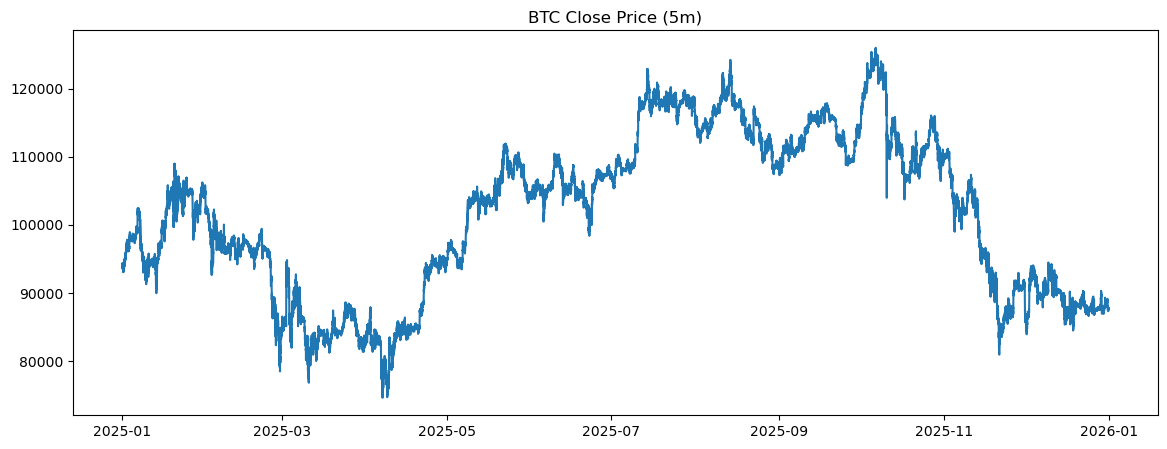

In [5]:
# price visualization
plt.figure(figsize=(14,5))
plt.plot(df["close"])
plt.title("BTC Close Price (5m)")
plt.show()


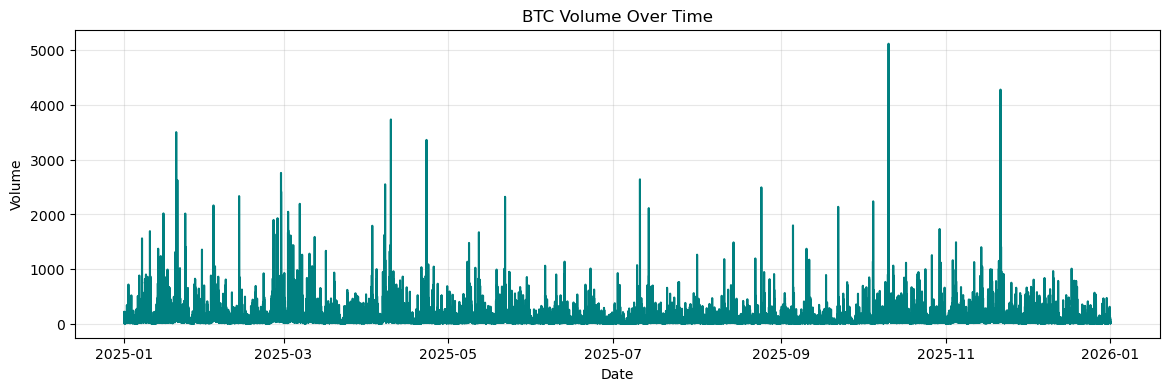

In [10]:
# volume

import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(14, 4))

# Use lineplot for large datasets

sns.lineplot(data=df, x=df.index, y="volume", color="teal")

# Add titles and labels
plt.title("BTC Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")

#  Add a grid for better readability
plt.grid(True, alpha=0.3)

plt.show()